# Compare Run Times

## Relative speed of Monte Carlo and Spectral Radius Methods

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

In [3]:
%run src/ssy_discretized_test.py

In [4]:
s = SSY()

In [5]:
def discrete_call(D):
    return test_val_spec_rad(s, K=D, I=D, J=D)
    

In [6]:
def continuous_call(D):
    f = mc_factory(s, K=D, I=D, J=D)
    return f(n=1000, m=1000)

In [7]:
%time discrete_call(10)

CPU times: user 7.65 s, sys: 8.54 ms, total: 7.66 s
Wall time: 6.34 s


0.9991631792726985

In [8]:
%time continuous_call(10)

CPU times: user 2 s, sys: 6.71 ms, total: 2 s
Wall time: 1.27 s


0.9995489581809913

In [9]:
comparisons = []
calls = [discrete_call, continuous_call]
results = np.empty(2)
D1, D2 = 3, 20

for d in range(D1, D2):
    for i, call in enumerate(calls):
        qe.tic()
        call(d)
        results[i] = qe.toc(verbose=False)
    comparisons.append(results[0] / results[1])

In [10]:
comparisons

[0.008002362254673285,
 0.0329140651384151,
 0.12295918798721613,
 0.36972805699373323,
 0.9130569448269507,
 2.0609205815334084,
 4.094267551736314,
 7.699452540218056,
 13.835929641313262,
 23.01223830913612,
 38.06257820188588,
 63.27175760084404,
 95.04972782994325,
 131.6920478677399,
 205.75292904771678,
 302.1455123041245,
 446.7517324901966]

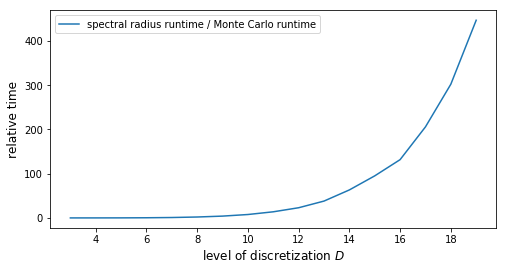

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range(D1, D2), np.array(comparisons), label="spectral radius runtime / Monte Carlo runtime")
ax.set_xlabel("level of discretization $D$", fontsize=12)
ax.set_ylabel("relative time", fontsize=12)
ax.legend()
plt.savefig("ssy_compare_run_times.pdf")
plt.show()